# Final Report CVaPR Project

## Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import sys
from umap import UMAP
import json
from pathlib import Path
from typing import List, Tuple, Dict
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import OrderedDict
from sklearn import set_config
# import seaborn as sns
from Plotter import *
import Scores

from Searchers import *

c:\users\kbklo\documents\github\cvapr\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\kbklo\documents\github\cvapr\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\kbklo\documents\github\cvapr\venv\lib\site-packages\umap\distances.

In [2]:
from MainFinal import *

## Load Data

In [3]:

predictor = KickstartedPredict(
    data_folder_path=r"%s\Data" % os.getcwd(),
    num_of_files_to_load=13,
)
predictor.load_data()


Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'deadline', 'goal', 'launched_at', 'name', 'staff_pick', 'state',
       'usd_pledged'],
      dtype='object')


## Prepare Data

In [4]:
# Prepare data
predictor.prepare_data()
#Split data
df = predictor.df_prepared
y: pd.DataFrame = df['state']
X_all: pd.DataFrame = df.drop('state', axis=1)
X_all = np.array(X_all)
X_num = X_all[:, :7]
X_cat = X_all[:, 7:]

Index(['goal', 'staff_pick', 'state', 'launched_month', 'launch_duration',
       'created_duration', 'name_word_len', 'blurb_word_len',
       'category_comics', 'category_crafts', 'category_dance',
       'category_design', 'category_fashion', 'category_film & video',
       'category_food', 'category_games', 'category_journalism',
       'category_music', 'category_photography', 'category_publishing',
       'category_technology', 'category_theater', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_GR', 'country_HK', 'country_IE',
       'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL',
       'country_NO', 'country_NZ', 'country_PL', 'country_SE', 'country_SG',
       'country_US'],
      dtype='object')


In [5]:
X_all = RobustScaler().fit_transform(X_all)

In [ ]:
X_all = QuantileTransformer().fit_transform(X_all)

In [ ]:
X_all = MinMaxScaler().fit_transform(X_all)

## Scale Data

In [ ]:
plt.hist(X_cat, range=(0.99, 1.0))

In [ ]:
plt.hist(X_num[:, 0], bins=100, range=(0.0, 50))

In [36]:
# umap splitted
# X_pca = PCA(n_components=25, whiten=False).fit_transform(X_all)
X_norm = MinMaxScaler().fit_transform(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=123)
umap_num = UMAP().fit(X_train[:, :7], y_train)


In [79]:
umap_cat = UMAP(n_neighbors=50).fit(X_train[:, 7:], y_train)

In [80]:
X_test_u_num = umap_num.transform(X_test[:, :7])
X_train_u_num = umap_num.embedding_

X_test_u_cat = umap_cat.transform(X_test[:, 7:])
X_train_u_cat = umap_cat.embedding_

c:\users\kbklo\documents\github\cvapr\venv\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [81]:
X_umap_test = np.concatenate([X_test_u_num, X_test_u_cat], axis=1)
X_umap_train = np.concatenate([X_train_u_num, X_train_u_cat], axis=1)
X_umap = np.concatenate([X_umap_test, X_umap_train], axis=0)

In [112]:
#Umap on all
X_norm = MinMaxScaler().fit_transform(X_all)
X_pca = PCA(n_components=30, whiten=False).fit_transform(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)
# umap = UMAP().fit(X_train, y_train)

In [27]:
X_test_u = umap.transform(X_test)
X_train_u = umap.embedding_
X_umap = np.concatenate([X_test_u, X_train_u])

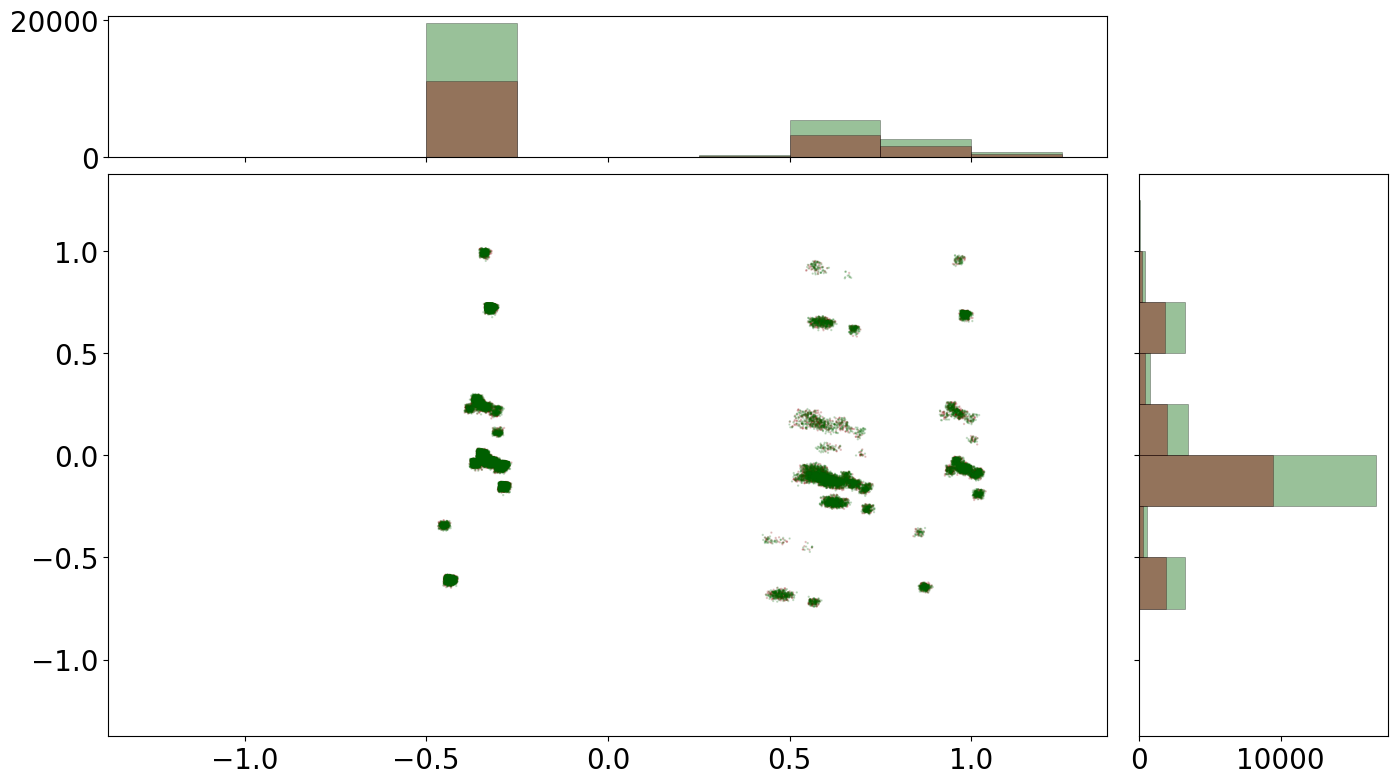

In [110]:
colors = np.array(["darkred"] * len(y[y == 0]))
colors = np.concatenate((colors, ["darkgreen"] * len(y[y == 1])), axis=0)
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(X_pca[:, 0], X_pca[:, 1], colors, ax, ax_histx, ax_histy)
plt.show()

In [94]:
clf = LogisticRegression(solver="saga")

In [89]:
clf.fit(X_train_u_num, y_train)

LogisticRegression(solver='saga')

In [113]:
scores = cross_validate(clf, X_pca, y, scoring=Scores.scores)
print("Accuracy: ", "%.3f"%scores['test_balanced_accuracy'].mean(), "%.3f"%(2*scores['test_balanced_accuracy'].std()))

Accuracy:  0.651 0.012
